In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<AxesSubplot:>

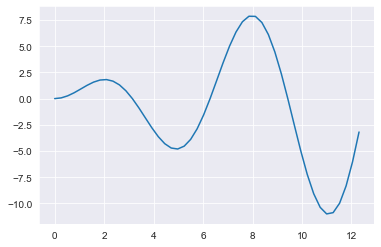

In [25]:
x = np.arange(0, np.pi * 4, np.pi/12)
y = x * ( np.sin(x) ** 1) 
# x
sns.lineplot(x=x, y=y)

93.0


<AxesSubplot:>

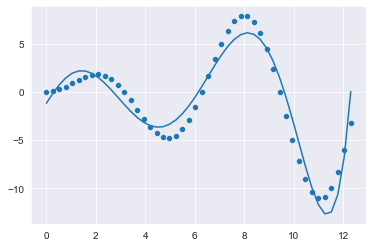

In [53]:
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)
# y_train
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feats = PolynomialFeatures(degree=6)
x_poly = poly_feats.fit_transform(x_train)
# x_poly
model = LinearRegression()
model.fit(x_poly, y_train)

y_predict = model.predict(x_poly)
print(model.score(x_poly, y_train).round(4) * 100)

# viz
sns.set_style('darkgrid')
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y_predict.flatten(), palette='Set2' )

## More PolyReg

In [129]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

n = 400
def f(x):
    return x * np.sin(x) * np.random.randn()
# domain we want to plot
x_plot = np.linspace(-1, 11, n)

In [130]:
x_train = np.linspace(0, 10, n)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, replace=False, size=20))
y_train = f(x_train)

# x_train = x_train[:, np.newaxis]
x_train = x_train.reshape(-1, 1) # equals to above code
x_plot = x_plot.reshape(-1, 1)

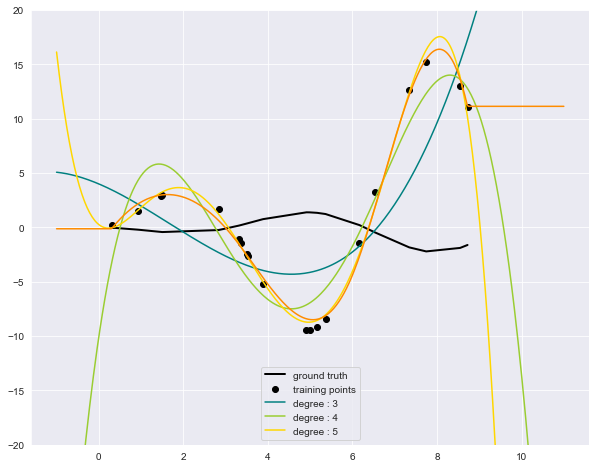

In [133]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)

ax.plot(x_train, f(x_train), linewidth=2, label='ground truth')
# plot training points
ax.scatter(x_train, y_train, label='training points')

# polynomial features
for deg in range(3, 6):
    model = make_pipeline(
        PolynomialFeatures(degree=deg),
        Ridge(alpha=1e-3))
    model.fit(x_train, y_train)
    y_plot = model.predict(x_plot)
    ax.plot(x_plot, y_plot, label=f'degree : {deg}')

# B-spline
model = make_pipeline(SplineTransformer(n_knots=4, degree=3),
                    Ridge(alpha=1e-3))
model.fit(x_train, y_train)
y_plot = model.predict(x_plot)
ax.plot(x_plot, y_plot)

ax.legend(loc='lower center')

ax.set_ylim(-20, 20)
plt.show()